In [45]:


def correct(df, var, covar=['age']):
    ''' Applies a correction for covariates to a given DataFrame'''

    model = '%s ~ 1 + %s'%(var, ' + '.join(covar))
    print 'Model used for correction:', model
    test_scores = ols(model, data=df).fit()

    err = test_scores.predict(df) - df[var]
    ycorr = np.mean(df[var]) - err

    return ycorr

opening
Index([u'subject', u'age', u'apo', u'label', u'side', u'surface_talairach',
       u'surface_native', u'maxdepth_talairach', u'maxdepth_native',
       u'meandepth_talairach', u'meandepth_native',
       u'hull_junction_length_talairach', u'hull_junction_length_native',
       u'GM_thickness', u'opening'],
      dtype='object')
S.Pe.C.sup. 0.0284073180036
S.Pe.C.sup. All>HO
0.00113364166669 0.00120740917138



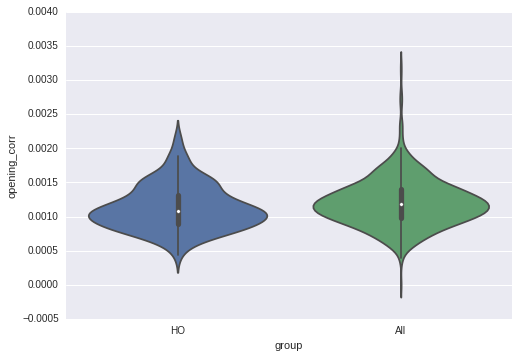

S.Pe.C.inf. 0.0123462950064
S.Pe.C.inf. All>HO
0.00110787512555 0.00120287499966



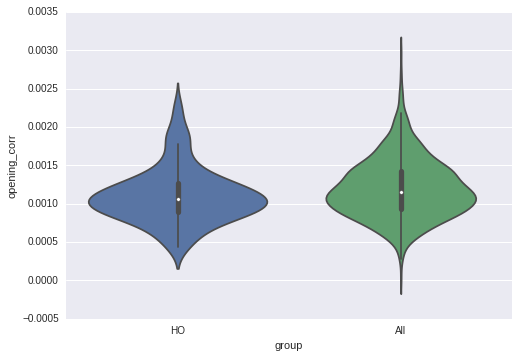

S.Pe.C.median. 0.136393033803
S.Pe.C.median. All>HO
0.00176441960691 0.00186147542636



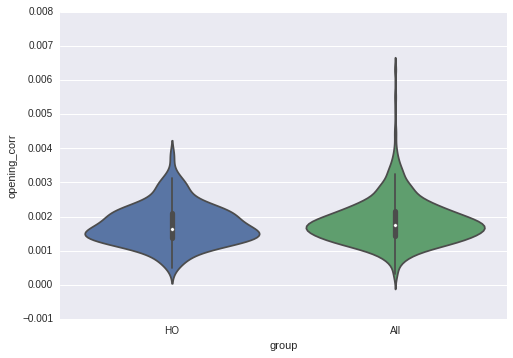

S.Pe.C.marginal. 0.239518506539
S.Pe.C.marginal. All>HO
0.00135495603824 0.0014084492039



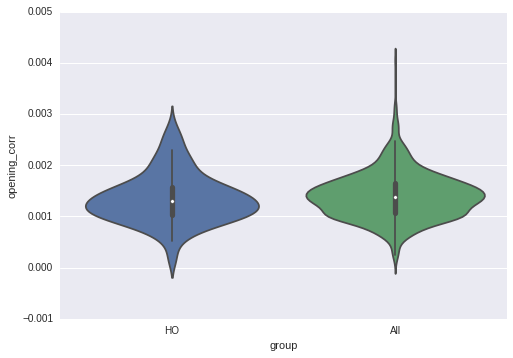

S.Pe.C.inter. 0.00189218550884
S.Pe.C.inter. All>HO
0.00109085573412 0.00118334589392



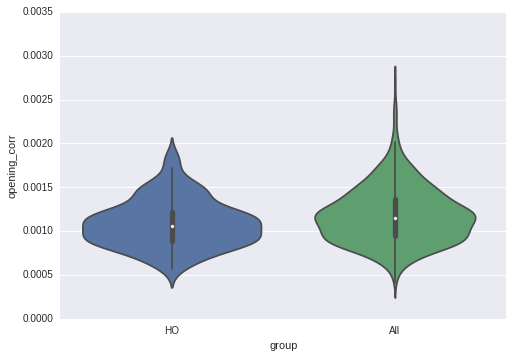

In [168]:
%run /home/grg/git/alfa/nilearn-helper.py
%run /home/grg/git/alfa/roicollect.py
from scipy import stats
import seaborn as sns
import scipy

    #sns.boxplot(x='group', y='roi', data=df, showfliers=False)
    #plt.show()

labels = json.load(open('/tmp/sulci_list.txt'))
groups_names = ['HO','All']
keys_lr = ['label', 'thickness_mean', 'thickness_std', 'CSF_volume', 'GM_volume', 'mean_depth', 'maxdepth', 'mindepth', 'size']
keys_morpho = [u'surface_talairach',
       u'surface_native', u'maxdepth_talairach', u'maxdepth_native',
       u'meandepth_talairach', u'meandepth_native',
       u'hull_junction_length_talairach', u'hull_junction_length_native',
       u'GM_thickness', u'opening']

key = 'opening' #keys[-1]
print key

side = 'right' #'or morphometry or left or right'
data = pd.read_excel('/home/grg/ALFA_sulci_morphometry.xls') 
#data = pd.read_excel('/home/grg/ALFA_sulci_%s.xls'%side)
print data.columns
data = data.set_index(data['subject'])
del data['subject']
tiv = json.load(open('/home/grg/spm/data/tiv.json'))
tiv = pd.DataFrame(tiv.items(), index=[string.atoi(e) for e in tiv.keys()], columns=['subject', 'tiv'])
#del tiv['subject']
data = data.join(tiv)
data['%s_corr'%key] = data[key] / data['tiv']


#data = data[data['side']==side]

preva = []

for label in [e for e in labels if 'S.Pe.' in e]:
    df = data[data['label'] == label].dropna()
    preva.append([label, len(df)])
    groups = get_groups(df, groups_names)
    box = [e['%s_corr'%key].tolist() for e in groups]
    
    grp = []
    for i, each in enumerate(groups):
        each['group'] = len(each['apo']) * [groups_names[i]]
        grp.append(each)
    df = pd.concat(grp)
    try:
        T = scipy.stats.ttest_ind(df[df['group']==groups_names[0]]['%s_corr'%key],
            df[df['group']==groups_names[1]]['%s_corr'%key])
    except TypeError:
        continue
    print label, T.pvalue
    #if T.pvalue>0.05: continue #print '!!!!!!!'
    #print stats.shapiro(box[0])[1], stats.shapiro(box[1])[1], stats.shapiro(box[2])[1]
    #print label
    if np.mean(box[0]) > np.mean(box[1]): # and np.mean(box[1]) > np.mean(box[2]):
        print label, 'HO>All' #HT>NC !'
        print np.mean(box[0]), np.mean(box[1])#, np.mean(box[2])
        print ''
    if np.mean(box[1]) > np.mean(box[0]):# and np.mean(box[1]) > np.mean(box[0]):
        print label, 'All>HO' #NC>HT>HO !'
        print np.mean(box[0]), np.mean(box[1])#, np.mean(box[2])
        print ''
    
#for label in labels[:]:
    #df = data[data['label']==label]
    #groups = get_groups(df, groups_names)
    #box = [e['%s_corr'%key].tolist() for e in groups]

    #plt.boxplot(box, labels=groups_names)
    #plt.show()
    
    sns.violinplot(x='group', y='%s_corr'%key, data=df) #, showfliers=False)

    plt.show()


S.T.pol.
S.T.s.
F.C.L.r.retroC.tr.
F.C.L.p.
S.Rh.
S.Pe.C.sup.
F.I.P.r.int.2
S.O.T.lat.int.
S.Pa.t.
S.O.T.lat.med.
S.p.C.
S.Po.C.sup.
S.Pe.C.inf.
S.Cu.
S.T.i.post.
S.Pe.C.median.
F.C.L.a.
S.F.sup.
F.Coll.
F.C.L.r.sc.post.
S.Or.
S.Pe.C.marginal.
S.GSM.
S.R.inf.
F.C.L.r.diag.
S.O.T.lat.ant.
F.I.P.
F.C.L.r.ant.
S.s.P.
S.Li.ant.
S.F.inf.
S.O.T.lat.post.
S.C.sylvian.
S.F.median.
F.C.L.r.sc.ant.
S.O.p.
F.C.L.r.asc.
OCCIPITAL
S.Olf.
S.Pa.int.
S.T.s.ter.asc.post.
S.Li.post.
S.Pe.C.inter.
INSULA
F.I.P.r.int.1
S.F.inf.ant.
F.C.M.ant.
S.F.polaire.tr.
F.C.M.post.
F.Cal.ant.-Sc.Cal.
S.C.LPC.
S.F.int.
S.F.orbitaire.
S.Pa.sup.
S.Call.
F.P.O.
S.F.marginal.
S.T.s.ter.asc.ant.
S.C.
S.T.i.ant.
S.F.inter.
F.I.P.Po.C.inf.


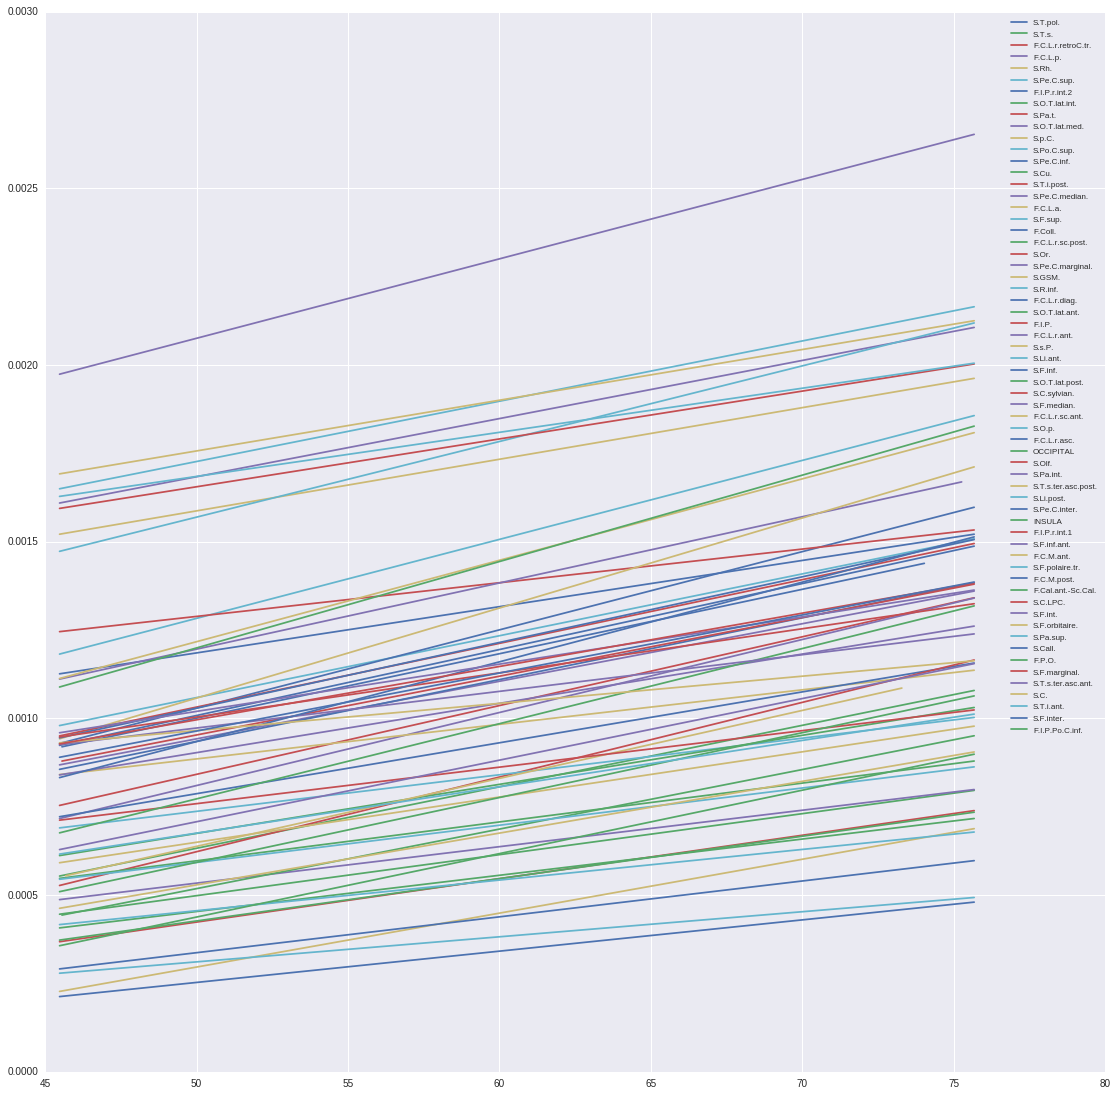

In [146]:
edgecolors = ['#800000','#003366','#ff8000','#cc6699','#33cc33']
facecolors = ['#ff9999','#99ccff','#ffd699','#ecc6d9','#adebad']
fig = plt.figure(figsize=(19,19), dpi=300, facecolor='white')

for i, label in enumerate(labels[:]):
    #label = labels[0]

    ax = fig.add_subplot(111) #len(labels),1,i+1) #len(labels),i+1)

    print label
    df = data[data['label']==label].dropna()
    if len(df) == 0: 
        print "zero"
        continue

    #ax.scatter(df['age'], df['%s_corr'%key], edgecolors=edgecolors[0], facecolors=facecolors[0])
    # Fits a line on the group data
    x = pd.DataFrame({'age': np.linspace(df['age'].min(), df['age'].max(), 100)})
    poly = ols(formula='%s_corr~1+age'%key, data=df).fit()
    ypred = poly.predict(x)

    # Draws the fitted line
    ax.plot(x['age'], ypred, linestyle='-',
            label=label, #$R^2$=%.2f $AIC$=%.2f $\sigma$=%.3e'
             #% (poly.rsquared, poly.aic, np.std(ypred)),
            alpha=1.0) #, color=edgecolors[0])
    ax.legend(prop={'size':8})
    #print np.corrcoef(df['age'], df['%s_corr'%key])
    #ax.set_title(str(label))
    #ax.text(0.15, 0.95, label, horizontalalignment='center',
    #    verticalalignment='center', transform = ax.transAxes
    #    )
    #plt.ylim((0, 0.6))
    
plt.show()
